***"Product Data Extraction and Discount Analysis from Borjan's Website"***

In [1]:
import requests
import pandas as pd

In [2]:
# Define the API URL
api_url = "https://www.borjan.com.pk/collections/sale/products.json"
headers = {'User-Agent': 'Mozilla/5.0'}  # To act like a real browser

# Send a GET request to fetch data
response = requests.get(api_url, headers=headers)

# Parse the JSON response
data = response.json()


In [3]:
# Get the list of all products
products = data['products']

# Create an empty list to save product info
product_list = []

# Loop through each product and extract details
for product in products:
    name = product['title']  # Product name
    product_url = "https://www.borjan.com.pk/products/" + product['handle']  # Product URL
    image_url = product['images'][0] if product['images'] else None  # First image
    current_price = float(product['variants'][0]['price']) / 100  # Price in PKR
    original_price = float(product['variants'][0]['compare_at_price']) / 100 if product['variants'][0]['compare_at_price'] else current_price
    
    # Save all extracted information
    product_list.append({
        'Product Name': name,
        'Product URL': product_url,
        'Image URL': image_url,
        'Current Price (PKR)': current_price,
        'Original Price (PKR)': original_price
    })


In [4]:
# Load your extracted CSV
# Convert the list into a DataFrame
df = pd.DataFrame(product_list)

# Multiply both current and original prices by 100
df['Current Price (PKR)'] = df['Current Price (PKR)'] * 100
df['Original Price (PKR)'] = df['Original Price (PKR)'] * 100

# Save the corrected file
df.to_csv('Borjan_scrapped.csv', index=False)

print("Prices corrected successfully!")


Prices corrected successfully!


## Data Visualization 

**Calculate the discount percentage for each product based on the current price and original price.**

In [5]:
# Calculate discount percentage
df['Discount (%)'] = ((df['Original Price (PKR)'] - df['Current Price (PKR)']) / df['Original Price (PKR)']) * 100
df['Discount (%)'] = df['Discount (%)'].round(2)  # Round to 2 decimal places

***What it does***

**Subtracts current price from original price and then divides by original price to get the discount ratio.**

**Multiplies by 100 to get the percentage.**

**Rounds to 2 decimal places for neatness.**

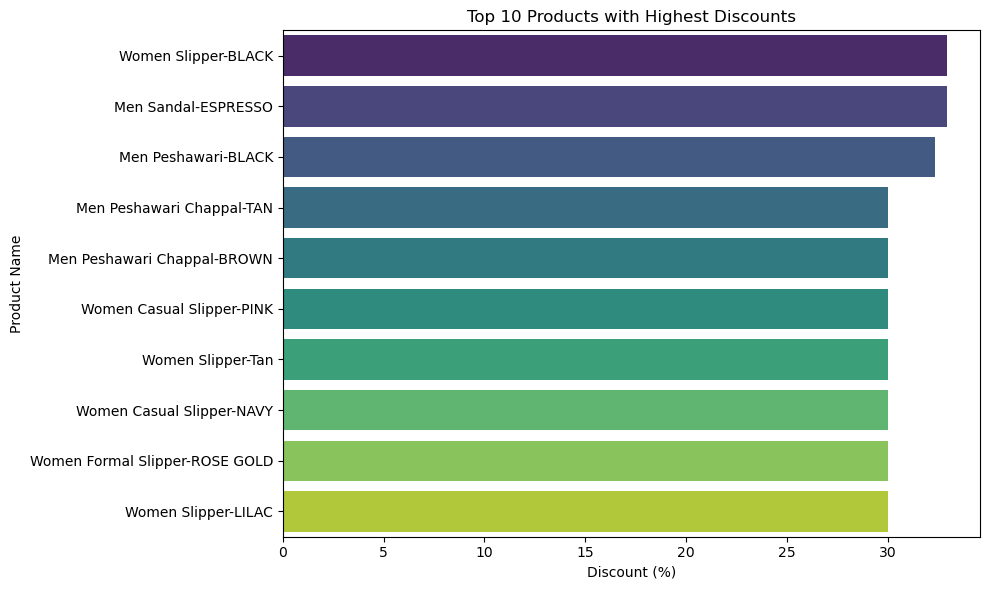

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort products by Discount Percentage in descending order (top discounts first)
df_sorted = df.sort_values(by='Discount (%)', ascending=False)

# Get the top 10 products with highest discounts
top_10_products = df_sorted.head(10)

# Create a bar chart for top 10 discounts
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount (%)', y='Product Name', data=top_10_products, palette='viridis')

# Title and labels
plt.title('Top 10 Products with Highest Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Product Name')

# Show plot
plt.tight_layout()
plt.show()
